## Fake News Detector

Autor: Joshua Kabwanga

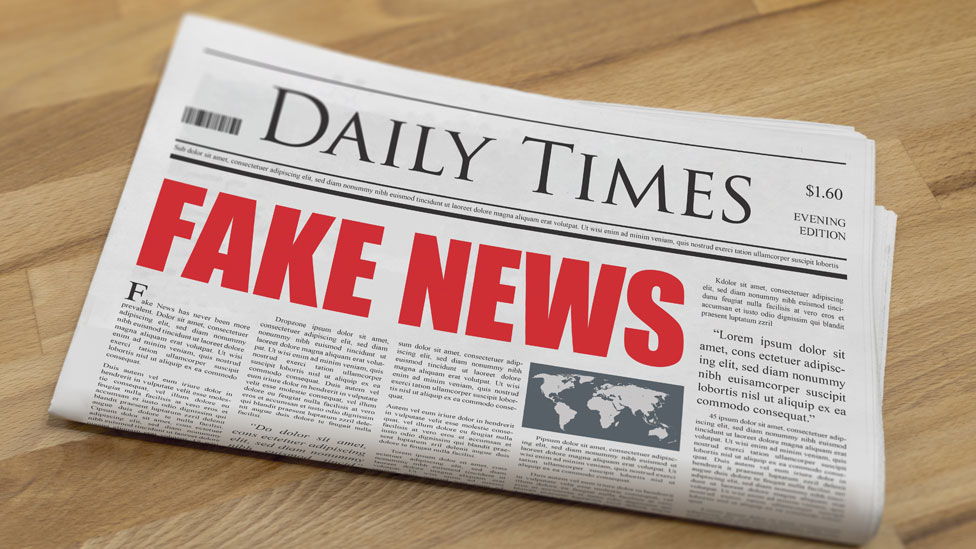

 Installing python Libraries

In [1]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
import re
import string

Loading the data

In [3]:
fake_news = pd.read_csv('datasets/Fake.csv')
true_news = pd.read_csv('datasets/True.csv')

View the fake news datasets

In [4]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


View the true news dataset

In [5]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Add a target column

In [6]:
fake_news['target'] = 0
true_news['target'] = 1

In [7]:
fake_news.shape, true_news.shape

((23481, 5), (21417, 5))

Combine the two dataset into one

In [8]:
data = pd.concat([fake_news, true_news], axis=0)

Reshuffling the all dataset

In [9]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)
data.head()

,title,text,subject,date,target
0,European parliament not moving from Strasbourg...,PARIS (Reuters) - France won t let the officia...,worldnews,"December 3, 2017",1
1,NATO says Catalonia issue domestic matter to b...,BRUSSELS (Reuters) - Spain remains an importan...,worldnews,"October 27, 2017",1
2,Lebanon's interior minister accuses Uber of no...,BEIRUT (Reuters) - Lebanon s interior minister...,worldnews,"December 21, 2017",1
3,OUTRAGEOUS VIDEOS: WATCH THE LEFTISTS BLAME TH...,The point is Alan Dershowitz made this absurd...,left-news,"May 9, 2015",0
4,EU tells easterners to take in refugees,BRUSSELS (Reuters) - Eastern European Union st...,worldnews,"September 12, 2017",1


C:\Users\A-Type\AppData\Local\Temp\ipykernel_6940\1322647145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'target', palette='rocket')


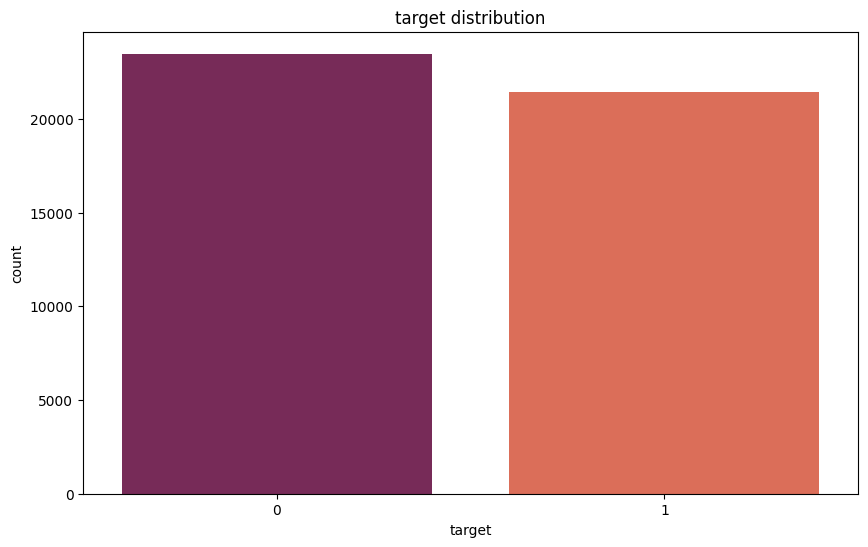

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'target', palette='rocket')
plt.title('target distribution')
plt.show()

Now let's check the distribution of the subject column

C:\Users\A-Type\AppData\Local\Temp\ipykernel_6940\3844006538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x='subject', palette='rocket')


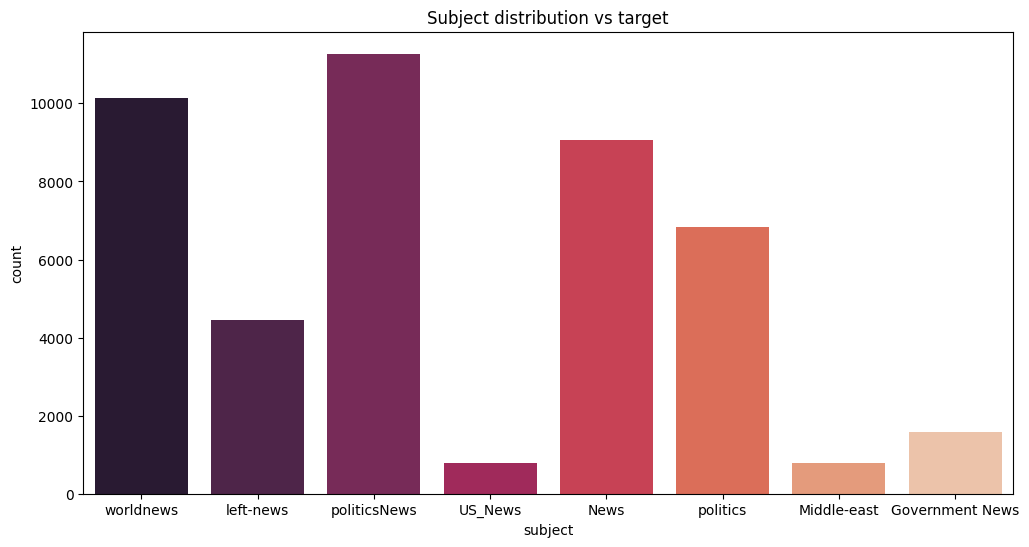

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data= data, x='subject', palette='rocket')
plt.title('Subject distribution vs target')
plt.show()

Remove unwated columns before training the data

In [12]:
data.drop(['title', 'subject', 'date'],axis=1, inplace=True)


let's check for duplicates values

In [13]:
data.duplicated().sum()


6251

we have 6251 duplicates value, the only way to forward here is to removed

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.isna().sum()

text      0
target    0
dtype: int64

In [16]:
data.head(5)

,text,target
0,PARIS (Reuters) - France won t let the officia...,1
1,BRUSSELS (Reuters) - Spain remains an importan...,1
2,BEIRUT (Reuters) - Lebanon s interior minister...,1
3,The point is Alan Dershowitz made this absurd...,0
4,BRUSSELS (Reuters) - Eastern European Union st...,1


create a function to process the text column 

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

data["text"] = data["text"].apply(wordopt)

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\A-Type\AppData\Local\Temp\ipykernel_6940\1850564063.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\A-Type\AppData\Local\Temp\ipykernel_6940\1850564063.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\A-Type\AppData\Local\Temp\ipykernel_6940\1850564063.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [ ]:
prin

#### Defining dependent and independent variables

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
X= data["text"]
y = data["target"]


In [20]:
Xv_train, Xv_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(Xv_train)
X_test = vectorization.transform(Xv_test)

In [22]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5952837 stored elements and shape (28985, 93316)>
  Coords	Values
  (0, 48036)	0.06600787749769715
  (0, 69445)	0.024018940794301103
  (0, 3030)	0.08548906520087363
  (0, 4392)	0.06092655202139574
  (0, 9380)	0.14737084178520488
  (0, 22260)	0.21417771375082106
  (0, 81658)	0.05497476092213748
  (0, 89618)	0.05935323151441008
  (0, 73870)	0.11174113832198261
  (0, 83437)	0.07798986735708456
  (0, 37217)	0.06721909213712317
  (0, 38789)	0.07939210361584287
  (0, 57217)	0.06605397153119394
  (0, 25584)	0.09119559132263945
  (0, 1401)	0.05190778085118796
  (0, 63166)	0.19166439717022385
  (0, 4452)	0.06344663554704173
  (0, 29930)	0.09712284070930795
  (0, 51703)	0.16735431379508203
  (0, 58640)	0.06389451482115298
  (0, 85204)	0.04061787176537438
  (0, 80337)	0.17913821554608167
  (0, 58237)	0.17324455839003183
  (0, 62743)	0.1403796628945231
  (0, 783)	0.15135357427960291
  :	:
  (28984, 38282)	0.13153811744283672
  (28984, 6

## Logistic regression model
* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [23]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [24]:
# Predict the class and the probability for each model
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

#Print out the predict set
y_pred.head()

,lr,l1,l2
0,0,0,0
1,0,0,0
2,1,1,1
3,0,0,0
4,1,1,1


In [25]:
y_prob.head()

,lr,l1,l2
0,0.965036,0.999869,1.000000
1,0.933192,0.999994,1.000000
2,0.939269,0.991727,0.999995
3,0.946438,0.999833,0.999999
4,0.967186,1.000000,1.000000


For each model, calculate the following error metrics:

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [26]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:
    precission, recall, fscore, _ =score(y_test,y_pred[lab], average="weighted")
    # accuracy calculation
    accurary = accuracy_score(y_test, y_pred[lab])

    # Roc -auc score can br calculate by binarizing the data

    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]), label_binarize(y_pred[lab], classes=[0,1]), average="weighted")

    # confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision': precission, 'recall' :recall,
                                 'fscore': fscore, 'accurary' : accurary, 'auc': auc},
                                   name=lab))
    
metrics = pd.concat(metrics, axis=1)


In [27]:
metrics

,lr,l1,l2
precision,0.983548,0.995550,0.991726
recall,0.983544,0.995550,0.991720
fscore,0.983539,0.995549,0.991718
accurary,0.983544,0.995550,0.991720
auc,0.983066,0.995395,0.991373


Plot the confusion matrix for each mode

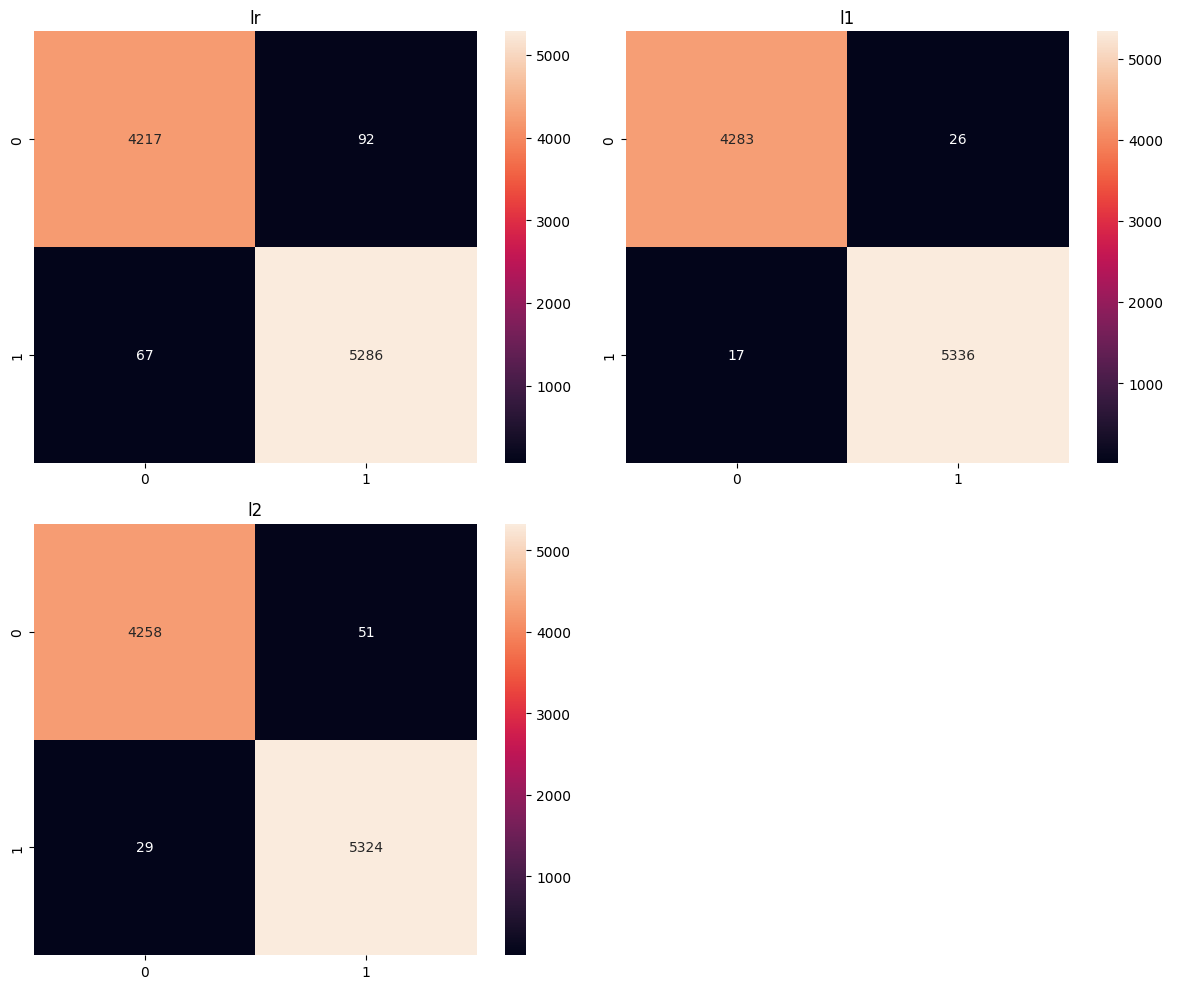

In [28]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax, lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()



## Build a SVM model with default parameters

The dataset has been splited the training and testing dataset.the above Training dataset will be used to train and tune models, and testing dataset will be used to evaluate the models. Note that you may also split a validation dataset from the training dataset for model tuning only.

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

fit the model

In [42]:
model = SVC(C=10, kernel='rbf')
model.fit(X_train, y_train.values.ravel())

SVC(C=10)

make predictions

In [43]:
preds = model.predict(X_test)

In [45]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [46]:
evaluate_metrics(y_test, preds)
print(classification_report(y_test,  preds))
print("Accuracy score", accuracy_score(y_test, preds))
print("f1_score", f1_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4309
           1       0.99      0.99      0.99      5353

    accuracy                           0.99      9662
   macro avg       0.99      0.99      0.99      9662
weighted avg       0.99      0.99      0.99      9662

Accuracy score 0.9918236389981371
f1_score 0.9926340326340326


## Model Testing

In [65]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_L = lr.predict(new_xv_test)
    pred_L1 = lr_l1.predict(new_xv_test)
    pred_L2 =lr_l2.predict(new_xv_test)
    pred_SVG = model.predict(new_xv_test)

    return print("\n\nlr Prediction: {} \nlr_l1 Prediction: {} \nlr_l2 Prediction: {} \nSVG Prediction: {}".format(output_lable(pred_L[0]), output_lable(pred_L1[0]),output_lable(pred_L2[0]), output_lable(pred_SVG[0])))

In [66]:
news = str(input())
manual_testing(news)



lr Prediction: Not A Fake News 
lr_l1 Prediction: Not A Fake News 
lr_l2 Prediction: Not A Fake News 
SVG Prediction: Not A Fake News


Indonesia to buy $1.14 billion worth of Russian jets,"JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threats of a cut in consumption by European Union countries. Indonesia is also trying to modernize its ageing air force after a string of military aviation accidents. Indonesia, which had a $411 million trade surplus with Russia in 2016, wants to expand bilateral cooperation in tourism, education, energy, technology and aviation among others. ",worldnews,"August 22, 2017 "

## The predictive model is correctly working `This is not a fake news`

## ---------------------------------------------------------------------------

In [67]:
news = str(input())
manual_testing(news)



lr Prediction: Fake News 
lr_l1 Prediction: Fake News 
lr_l2 Prediction: Fake News 
SVG Prediction: Fake News


Trump supporters and the so-called president s favorite network are lashing out at special counsel Robert Mueller and the FBI. The White House is in panic-mode after Mueller obtained tens of thousands of transition team emails as part of the Russian probe. Ironically, it will quite possibly be emails that brings Trump down.A lawyer for the Trump transition team is claiming that the emails had been illegally turned over by the General Services Administration because the account owners never received notification of the request and he s claiming that they were  privileged communications. In a letter, Trump s attorney requested that Congress  act immediately to protect future presidential transitions from having their private records misappropriated by government agencies, particularly in the context of sensitive investigations intersecting with political motives. Mueller spokesman Peter Carr defended the special counsel s work in a statement issued just past midnight on Sunday, several hours after claims of   unlawful conduct  by Trump s attorney were made, according to Politico. When we have obtained emails in the course of our ongoing criminal investigation, we have secured either the account owner s consent or appropriate criminal process,  he said.The words that pop out in the statement are  criminal investigation,  the  account owner s consent  and  criminal process. While on the campaign trail, Donald Trump asked Russians to hack Hillary Clinton s emails. After the election, Trump s team is claiming that Mueller obtained the transition teams  emails illegally, even though that s not the truth. We see a pattern here.Team Trump thought Mueller was on a fishing expedition. Turns out, he was actually reeling in the fish. The White House was not aware at the time that he had the emails. Mueller got them through GSA so that team Trump could not selectively leave any out if they were requested.Merry Christmas, Mr. Trump.Photo by Ann Heisenfelt/Getty Images.


## The predictive model is correctly working  `This is a fake news`